# Exploration_1 
## - Rock Scissor Paper -
### 가위바위보 이미지 분류하기

In [1]:
from PIL import Image
import glob
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

### PIL?
* Python Imaging LIbrary, 이미지 분석 및 처리를 쉽게 할 수 있는 라이브러리
* 다양한 이미지 파일 형식(PPM, PNG, JPEG, GIF 등)을 지원하며, 강력한 이미지 처리와 그래픽 기능을 제공
* 주요기능 : 픽셀단위의 조작, 흐림/윤곽 보정 다듬어 윤곽 검출 등의 이미지 필터, 마스킹 및 투명도 제어 ...
* -> 가위바위보 데이터 이미지 크기(224x224)를 (28x28)로 줄일 때 사용
---
### glob?
* 특정 패턴이나 확장자를 가진 파일 출력하기
* glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
* 조건에 '*','?' 같은 와일드카드만 지원
* -> 확장자가 */.jpg인 파일만 모아 출력할 때 사용
---
### os?
* 운영체제(operating system)를 제어
* 참고! os모듈의 getcwd()는 현재 작업 디렉터리를 알려주는 기능도 있음
* -> os모듈의 getenv()함수는 환경 변수를 가져올 때 사용
---
### numpy?
* Numerical Python, C언어로 구현된 파이썬 라이브러리
* 고성능의 수치계산을 위해 제작
* 벡터 및 행렬 연산에 있어서 매우 편리한 기능 제공
* 데이터분석을 할 때 사용되는 pandas와 matplotlib라이브러리의 기반으로 사용하기도 함
* 기본적으로 array(행렬) 단위로 데이터를 관리, 연산 수행
* -> load_data함수에서 이미지 데이터 담을 행렬 생성에 사용
---
### tensorflow?
* 데이터 플로우 그래프를 이용하여 수치화된 계산에 최적화한 오픈소스 라이브러리
* -> import keras
---
### matplotlib?
* 파이썬에서 데이터를 차트나 플롯으로 그려주는 라이브러리 패키지
* -> 데이터 시각화에 사용
---
### keras?
* 파이썬으로 작성된 고수준 신경망 API로 tensorflow와 함께 사용할 수 있음
* 최대한 빠르게 구현하는데 중점을 둠
* -> 모델 네트워크 생성에 사용
---

## 1.  데이터 준비

In [2]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized")
    
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

400  images to be resized
400  images resized.
가위 이미지 resize 완료!
400  images to be resized
400  images resized.
바위 이미지 resize 완료!
400  images to be resized
400  images resized.
보 이미지 resize 완료!


#### 데이터 불러오기 + Resize 하기
1. glob모듈의 glob함수를 사용하여, 매개변수 img_path 내부에 있는 '/*.jpg'형식의 파일을 리스트 형식으로 반환하여 변수 images에 저장
2. images 리스트에 있는 모든 파일을 하나씩 가져와서 크기가 (224x224)인 원본 이미지를 크기가 (28x28)인 새로운 이미지로 resize해서 변수 new_img에 저장
3. os.getenv()로 환경변수를 가져와서 불러올 이미지 데이터의 디렉토리를 변수 image_dir_path에 저장
4. for문을 거쳐 resize된 이미지 데이터들을 준비
5. 가위, 바위, 보 각각 400개의 데이터를 가짐

In [4]:
def load_data(img_path, number_of_data = 1200):
    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data * img_size * img_size * color,
                    dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data,dtype=np.int32)
    
    # (가위 : 0, 바위 : 1, 보 : 2)
    idx = 0
    for file in glob.iglob(img_path+'/scissor/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(X_train, y_train)=load_data(image_dir_path)
X_train_norm = X_train/255.0 # 입력은 0~1 사이의 값으로 정규화

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1200 입니다.
X_train shape: (1200, 28, 28, 3)
y_train shape: (1200,)


---
#### training data 준비 + 정규화
1. load_data()함수는 os.getenv()환경변수로 읽어드린 rock_paper_scissor 폴더 위치를 입력받음
2. 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
3. 가위, 바위, 보 각각 400개씩 총 1,200개의 데이터를 X_train에는 학습할 데이터를 y_train에는 데이터 라벨(정답)을 저장
4. 정규화시키는 이유 : 데이터가 가진 feature의 스케일 차이를 줄여 동일한 정도의 스케일로 반영되도록 하기 위해(즉, 모델에 주입되는 데이터들을 균일하게 만들기 위해)
5. 이미지 데이터는 각 픽셀의 값이 0 ~ 255 범위에 있으므로 데이터들을 255.0으로 나눠서 0 ~ 1 사이의 값으로 정규화시킴

라벨:  0


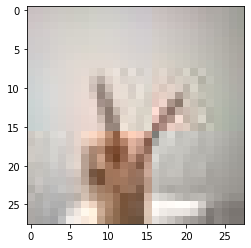

In [5]:
plt.imshow(X_train[100])
print('라벨: ', y_train[100])

라벨:  1


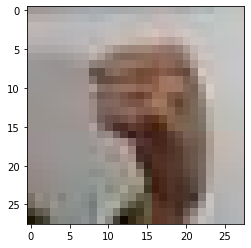

In [6]:
plt.imshow(X_train[700])
print('라벨: ', y_train[700])

라벨:  2


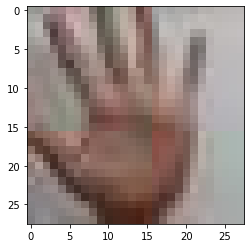

In [7]:
plt.imshow(X_train[1100])
print('라벨: ', y_train[1100])

---
1. 데이터가 잘 준비됐는지 plt.imshow로 가위,바위,보 하나씩 확인해보았다.
2. resize한 결과 데이터의 질이 나빠지기 때문에, 처음 학습시킬 데이터를 선택할 때 비교적 흰 바탕에 손만 잘 나온 것들 위주로 세팅해주었다. (깔끔하지 않은 배경이나 손이 작게 나온 이미지를 세팅해준 결과 정확도에 영향을 많이 미쳤기 때문에)

## 2. 딥러닝 네트워크 설계

In [19]:
n_channel_1 = 32 # 얼마나 다양한 이미지의 특징을 살펴볼 것인지(입력 이미지가 다양할수록 더 많은 특징 고려)
n_channel_2 = 64 # 위와 동일
n_dense = 64     # 분류기 알고리즘을 얼마나 복잡하게 할 것인지(복잡한 문제일수록 이 수를 늘려보자)
n_train_epoch = 15 # 몇 회 학습시킬 것인지

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation = 'relu', input_shape = (28,28,3))) # 입력 이미지의 형태
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax')) # 최종 분류기의 class수. 가위,바위,보 총 3개의 class

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (

---
* Conv2D : 영상 처리에 주로 사용
* MaxPool2D : Conv2D layer의 출력 이미지에서 주요값만 뽑아 크기가 작은 출력 영상을 만듬
* MaxPooling2D : MaxPooling2D와 동일한 기능 수행
* Flatten : 영상을 1차원으로 만듬

---
#### n_channel_1, n_channel_2
1. Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수이다. 여기서는 32와 64를 사용하였다. 가장 먼저 32개의 이미지 특징을, 그 뒤에 64개의 이미지 특징을 고려하겠다는 뜻이다.훨씬 디테일하고 복잡한 이미지일수록 이 특징 숫자를 늘려주는 것을 고려해볼 수 있다.
2. 네트워크를 설계할 때 이 특징수를 16과 32로 입력해보고 32와 64로도 입력해본 결과, 특징 숫자가 클수록 정확도가 올라가는 것을 알 수 있었다.
3. 그러나 64와 128을 입력해본 결과 다시 정확도가 떨어지는 결과를 얻었다. 특징 수를 마냥 높게 잡는 것도 좋지 않다는 것을 알 수 있었다.

---
#### n_dense
1. Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자이다. 이 값이 클수록 보다 복잡한 분류기를 만들 수 있다. 가위,바위,보 3개의 이미지만 구분하면 되기 때문에 처음에 10을 입력한 결과 accuracy = 0.3183 를 얻었다.
2. 단지 구분해야할 class수에 비례해서 뉴런의 숫자를 적용하는 것이 아니라, 비록 3개만 구분하는 경우라도 그 이미지가 얼마나 복잡하냐에 따라 뉴런의 숫자를 융통성있게 적용해줘야 한다는 것을 알았다.
3. 따라서 32(->0.9858) 다음 64(->1) 단계를 거쳐 최종적으로 64를 입력해주었다.

In [20]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = n_train_epoch)

Epoch 1/15
38/38 [==============================] - 0s 3ms/step - loss: 8.1743 - accuracy: 0.4867
Epoch 2/15
38/38 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.7692
Epoch 3/15
38/38 [==============================] - 0s 3ms/step - loss: 0.1861 - accuracy: 0.9375
Epoch 4/15
38/38 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9750
Epoch 5/15
38/38 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9767
Epoch 6/15
38/38 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9858
Epoch 7/15
38/38 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9942
Epoch 8/15
38/38 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 9/15
38/38 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 10/15
38/38 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 11/15
38/38 [

---
* optimizer : training data를 이용하여 모델을 학습 할 때 데이터의 실제 결과와 모델이 예측한 결과를 기반으로 손실 함수 값을 잘 줄일 수 있게 만들어주는 역할
* adam : Adaptive Moment Estimation. 현재 가장 많이 사용되는 optimizer
* loss(손실함수) : 실제 정답과 모델이 예측한 값 사이의 차이를 나타낸 함수
* sparse_categorical_crossentropy : 다중 분류 손실 함수. 정수타입의 클래스. 한 샘플에 여러 클래스가 있거나 label이 soft확률일 경우 사용
* metrics(평가지표) : 훈현된 모델의 성능을 평가할 때 어떤 평가지표로 평가할지 결정

---
#### epochs(에포크)
1. 딥러닝에서 모든 train data가 한 번씩 모델을 통과한 횟수로, 모든 학습 데이터셋을 학습하는 횟수를 의미한다.
2. 1 epoch은 전체 학습 데이터셋이 한 신경망에 적용되어 순전파와 역전파를 통해 신경망을 한 번 통과했다는 의미다. 즉, epoch이 10이면 모델에 학습 데이터셋을 10회 학습시켰다는 의미다.
3. epoch를 높일수록 다양한 무작위 가중치로 학습을 해볼 수 있기 때문에, 적합한 파라미터를 찾을 확률이 올라간다. 그러나 지나치게 epoch를 높이게 되면, 그 학습 데이터셋에 과적합(overfitting)되어 다른 데이터에 대해서 제대로 된 예측을 하기 어렵다.
4. 처음 10(->0.9992)회 학습을 시킨 결과 학습데이터의 정확도는 높았으나 결과적으로 테스트 데이터의 예측 정확도는 0.5866...으로 기준 미달이었다. 두 번째는 20회 학습시킨 결과 최종 정확도는 0.6399...로 가까스로 기준을 넘었다.
5. 따라서 최종적으로 15회 학습을 시켰고, 테스트 데이터의 예측 정확도도 기준치 이상인 0.7033...을 얻을 수 있었다.

## 3. test data를 이용한 모델 평가

In [21]:
# X_test, y_test를 만드는 방법은 X_train, y_train을 만드는 방법과 아주 유사
# 가위, 바위, 보 파일마다 테스트 데이터를 모두 28x28로 resize해서 저장

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

def load_test_data(img_path, number_of_data = 300): # test data는 총 300개
    img_size = 28
    color = 3
    # 테스트 데이터와 라벨 데이터(가위:0, 바위:1,보:2)를 담을 행렬 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color,
                    dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 0 # 가위:0
        idx = idx + 1
        
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 1 # 바위:1
        idx = idx + 1
        
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 2 # 보:2
        idx = idx + 1
        
    print("학습데이터(X_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(X_test, y_test) = load_test_data(image_dir_path)
X_test_norm = X_test / 255.0 # 입력은 0~1 사이의 값으로 정규화

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized
100  images resized.
100  images to be resized
100  images resized.
100  images to be resized
100  images resized.
학습데이터(X_train)의 이미지 개수는 300 입니다.
X_test shape: (300, 28, 28, 3)
y_test shape: (300,)


---
* 위에서 train data와 동일한 방식으로 test data(300개)를 불러오고, 28x28로 resize 해준다.

라벨:  0


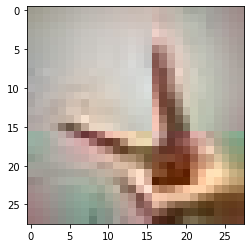

In [11]:
plt.imshow(X_test[10])
print('라벨: ', y_test[10])

라벨:  1


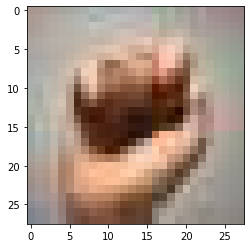

In [12]:
plt.imshow(X_test[150])
print('라벨: ', y_test[150])

라벨:  2


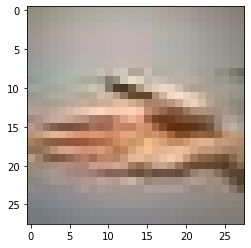

In [13]:
plt.imshow(X_test[270])
print('라벨: ', y_test[270])

---
* test data도 잘 불러와지고 resize되었는지 가위,바위,보 각각 하나씩 plt로 확인해보았다.

In [22]:
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.0697 - accuracy: 0.7033
test_loss: 1.0697346925735474 
test_accuracy: 0.70333331823349


---
* 최종적으로 정확도 0.70를 얻었다.

---
## 4. 결론
1. 가위바위보 이미지 분류기 모델의 정확도 : 약 70%
2. train data : 총 1,200개
3. test data : 총 400개

---
## 5. 회고

#### 아쉬운점
1. resize한 결과 데이터의 질이 나빠지기 때문에, 다소 한정적인 데이터를 선별해야했다. 원본 이미지의 size도 유지시키고 다양한 배경에서 찍은 경우의 사진도 training data에 넣어도 정확도가 높은 모델 네트워크 설계 공부가 추가적으로 필요한 것 같다.
2. 일반적으로 분류 모델에서 train : test = 8 : 2 로 데이터셋을 세팅해주는게 이상적이다. 하지만 이번 프로젝트에서는 4 : 1 로 다소 아쉬운 수준으로 세팅해주었다. 학습 데이터가 테스트 데이터에 비해 양이 적었고 그 결과 정확도에도 영향을 미친 것 같다.(최대 69% 밖에 나오지 않았다...)

---
#### 배운점(위에서도 언급한 바 있음)
1. Conv2D 레이어의 첫 번째 인자인 이미지 특징의 수를 정하는 과정에서, 특징 숫자가 클수록 정확도가 올라가는 것을 알 수 있었다. 그러나 특징 수를 마냥 높게 잡는 것도 좋지 않다는 것도 알 수 있었다.(오히려 정확도가 떨어질 수 있다.)
2. Dense 레이어의 첫 번째 인자인 분류기에 사용되는 뉴런의 숫자를 정하는 과정에서, 이 값이 클수록 보다 복잡한 분류기를 만들 수 있다는 것을 알았다. 그러나 단지 구분해야할 class수에 비례해서 뉴런의 숫자를 적용하는 것이 아니라, 구분해야 할 class수가 작은 경우라도 그 이미지가 얼마나 복잡하냐에 따라 뉴런의 숫자를 융통성있게 적용해줘야 한다는 것을 알았다.
3. epoch를 높일수록 다양한 무작위 가중치로 학습을 해볼 수 있기 때문에, 적합한 파라미터를 찾을 확률이 올라간다. 그러나 지나치게 epoch를 높이게 되면, 그 학습 데이터셋에 과적합(overfitting)되어 다른 데이터에 대해서 제대로 된 예측을 하기 어렵다. 그렇기에 여러번의 시도 끝에 적절한 값을 찾아야 한다는 것을 알았다.